<h2> intsall all necessary packages </h2>

In [15]:
!pip install nbimporter
import matplotlib.pyplot as plt       #module for plotting
import numpy as np 
import pywt                           #open source wavelet transform software
import nbimporter                     # to import audio_code

Defaulting to user installation because normal site-packages is not writeable


<h2> Perform foreward and inverse wavelet transformation </h2>

In [45]:
#import and renload audio code
import audio_code
# Nach einer Änderung neu laden
importlib.reload(audio_code)

<module 'audio_code' from 'audio_code.ipynb'>

<h3> Everything you need to tell the code :D </h3>

In [48]:
# Choose a wavelet
wavelet = 'mexh'  

<h3> Foreward and continuous wavelet transformation </h3>

44100


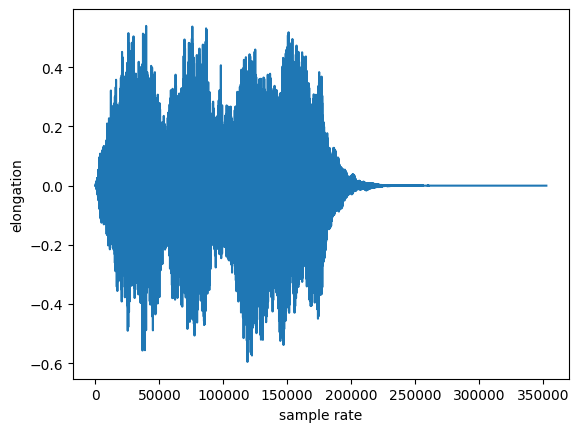

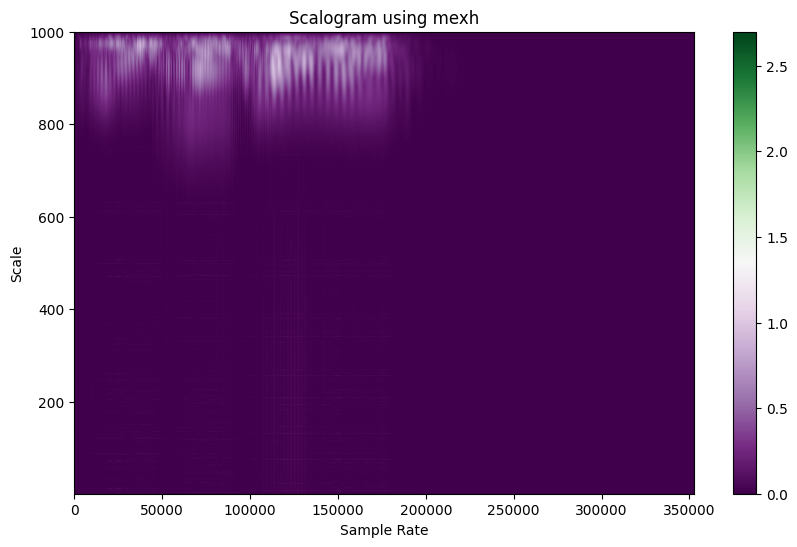

In [49]:
signal, sr = audio_code.signal_load() # loads your audio signal

# Perform Continuous Wavelet Transform
coefficients, frequencies = pywt.cwt(signal, scales=np.arange(1, 500), wavelet=wavelet) 

# Plot the wavelet transform (scalogram)
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[0, len(signal), 1, 1000], cmap='PRGn', aspect='auto',
           vmax=abs(coefficients).max(), vmin=0)
plt.colorbar()
plt.title('Scalogram using {}'.format(wavelet))
plt.xlabel('Sample Rate')
plt.ylabel('Scale')
plt.show() 

<h2> Plot Results in Different Scales </h2>

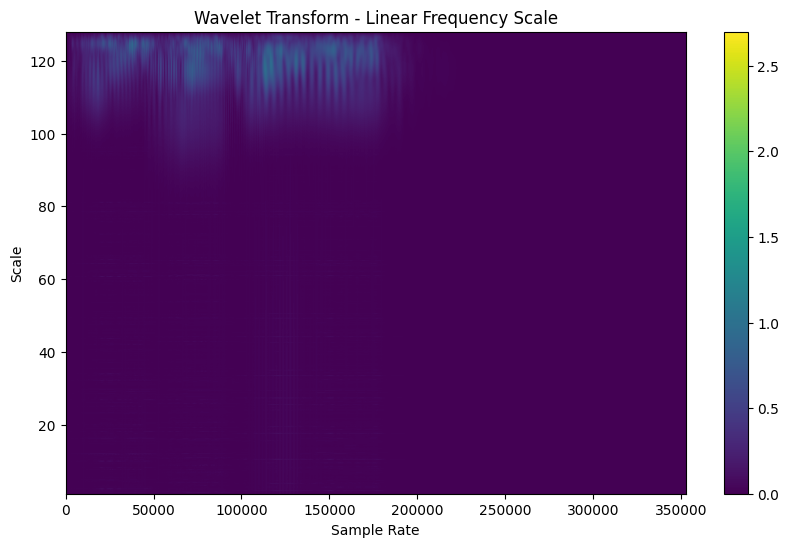

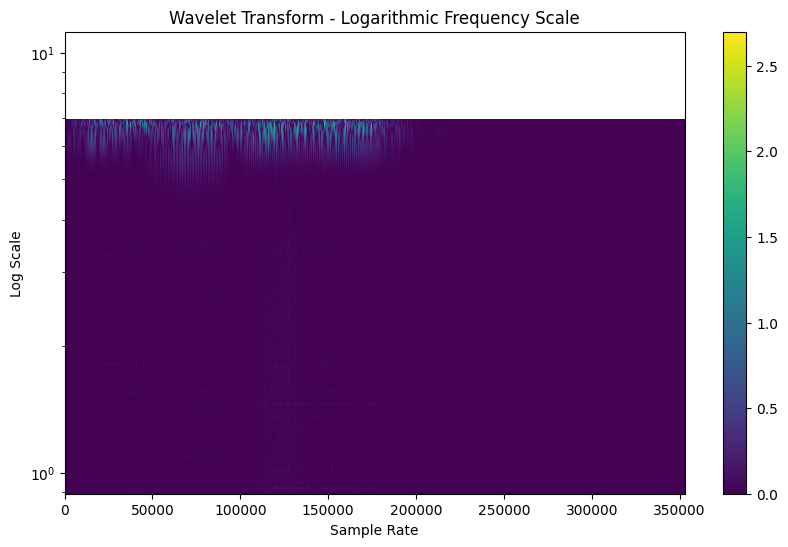

In [40]:
# Plot in Linear and Logarithmic Scales

# Linear Frequency Scale
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[0, len(signal), 1, 128], cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Wavelet Transform - Linear Frequency Scale')
plt.xlabel('Sample Rate')
plt.ylabel('Scale')
plt.show()

# Logarithmic Frequency Scale
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[0, len(signal), np.log2(1), np.log2(128)], cmap='viridis', aspect='auto')
plt.colorbar()
plt.yscale('log')
plt.title('Wavelet Transform - Logarithmic Frequency Scale')
plt.xlabel('Sample Rate')
plt.ylabel('Log Scale')
plt.show()

<h2> Inverse continuous wavlet transformation </h2>


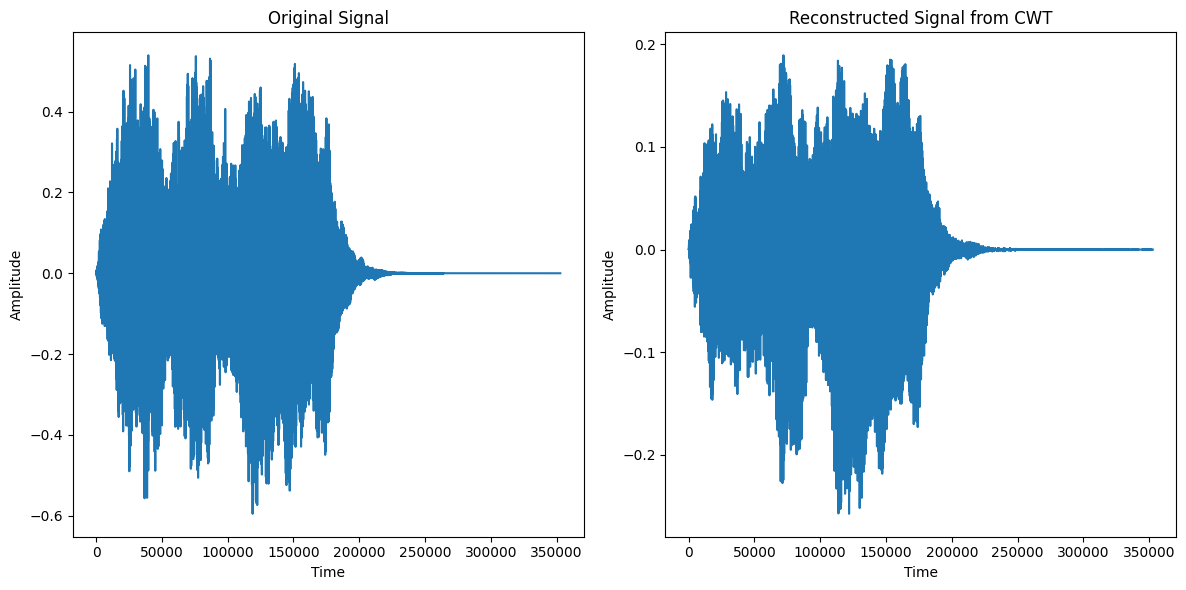

In [42]:
reconstructed_signal = np.real(np.sum(coefficients, axis=0) / len(coefficients))
# Plot the original signal and the reconstructed signal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(reconstructed_signal)
plt.title('Reconstructed Signal from CWT')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()